In [1]:
# étape 1: téléchargement des données

import yfinance as yf
import pandas as pd
tickers = ["^GSPC", 'MSFT', 'TSLA', 'XOM']
print(" Téléchargement des données (2021-2024)...")
data = yf.download(tickers, start="2021-01-01", end="2024-12-31")

data = data.dropna()

lignes, colonnes = data.shape
print(f" Données prêtes : {lignes} jours de cotation récupérés.")

print(" Création du fichier Excel...")
data.to_excel(r"C:\Users\SALMA\Desktop\SP500_4Assets_Grouped.xlsx")
print(" Fichier SP500_4Assets_Grouped.xlsx créé avec succès !")




 Téléchargement des données (2021-2024)...


/tmp/ipython-input-367/597872555.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2021-01-01", end="2024-12-31")
[*********************100%***********************]  4 of 4 completed


 Données prêtes : 1004 jours de cotation récupérés.
 Création du fichier Excel...
 Fichier SP500_4Assets_Grouped.xlsx créé avec succès !


 Rendements calculés avec succès ! Voici les 3 premiers jours :


Ticker,MSFT,TSLA,XOM,^GSPC
Date,,,,
2021-01-05,0.000965,0.007291,0.047067,0.007058
2021-01-06,-0.026272,0.027995,0.025197,0.005694
2021-01-07,0.028060,0.076448,0.007815,0.014738


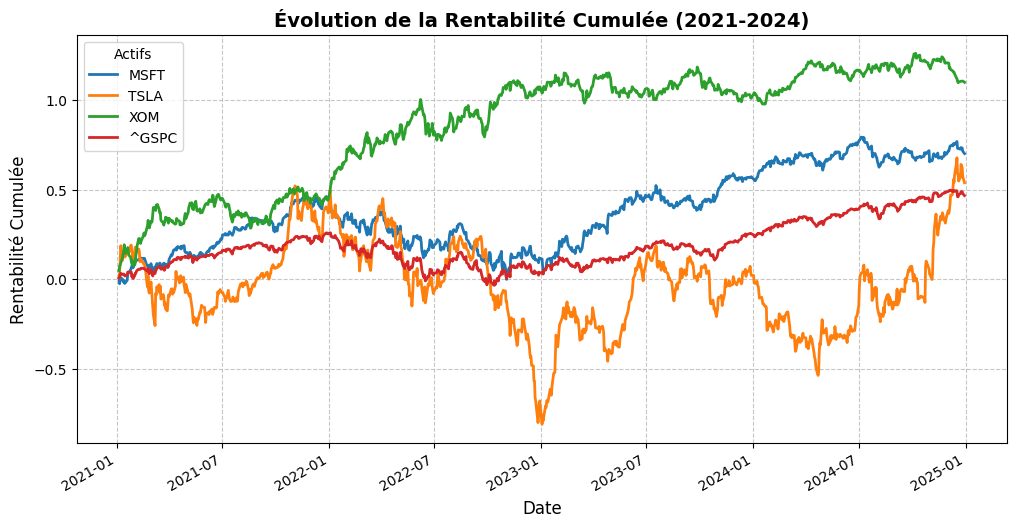


 Matrice de Covariance (Annualisée) :


Ticker,MSFT,TSLA,XOM,^GSPC
Ticker,,,,
MSFT,0.068022,0.064892,0.004863,0.033579
TSLA,0.064892,0.357593,0.009957,0.053416
XOM,0.004863,0.009957,0.077586,0.014931
^GSPC,0.033579,0.053416,0.014931,0.027256


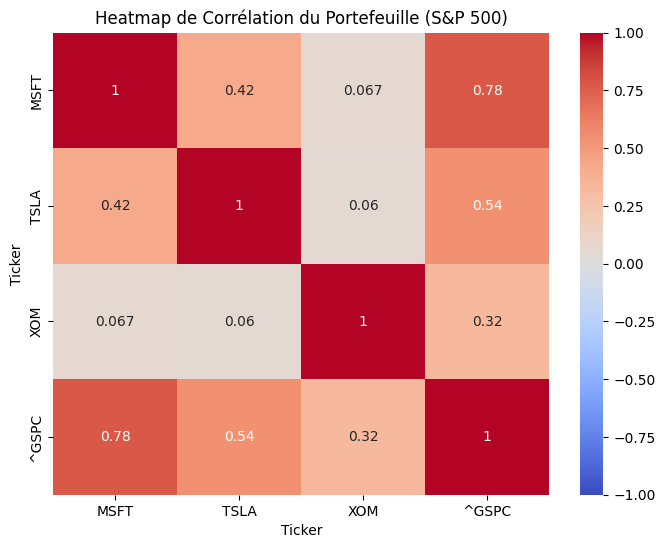

In [2]:
# ÉTAPE 2 : CALCUL DES RENDEMENTS

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

prix = data['Close']

rendements = np.log(prix / prix.shift(1)).dropna()

print(" Rendements calculés avec succès ! Voici les 3 premiers jours :")
display(rendements.head(3))

rendements_cumules = rendements.cumsum()

rendements_cumules.plot(figsize=(12, 6), linewidth=2)

plt.title("Évolution de la Rentabilité Cumulée (2021-2024)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rentabilité Cumulée", fontsize=12)


plt.legend(title="Actifs", loc="upper left")

plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

cov_matrix = rendements.cov() * 252
print("\n Matrice de Covariance (Annualisée) :")
display(cov_matrix)

corr_matrix = rendements.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Heatmap de Corrélation du Portefeuille (S&P 500)")
plt.show()



In [3]:
# étape 3:Béta(régression linéaire)

import scipy.stats as stats

Rm = rendements['^GSPC']

actions = ['MSFT', 'TSLA', 'XOM']

print(" RÉSULTATS DE LA RÉGRESSION (MODÈLE DE MARCHÉ) \n")


for action in actions:

    Ri = rendements[action]

    pente, intercept, r_value, p_value, std_err = stats.linregress(Rm, Ri)

    beta = pente

    alpha = intercept

    r_carre = r_value ** 2

    variance_totale = Ri.var()

    variance_systematique = (beta ** 2) * Rm.var()

    variance_specifique = variance_totale - variance_systematique



    print(f"--- Action : {action} ---")

    print(f" Bêta (Risque Systématique) : {beta:.2f}")

    print(f" Alpha (Surperformance)     : {alpha:.4f}")

    print(f" R²                         : {r_carre:.2%}")

    print(f" Part du Risque Spécifique  : {variance_specifique / variance_totale:.2%}")

    print("-" * 30)

 RÉSULTATS DE LA RÉGRESSION (MODÈLE DE MARCHÉ) 

--- Action : MSFT ---
 Bêta (Risque Systématique) : 1.23
 Alpha (Surperformance)     : 0.0001
 R²                         : 60.82%
 Part du Risque Spécifique  : 39.18%
------------------------------
--- Action : TSLA ---
 Bêta (Risque Systématique) : 1.96
 Alpha (Surperformance)     : -0.0004
 R²                         : 29.27%
 Part du Risque Spécifique  : 70.73%
------------------------------
--- Action : XOM ---
 Bêta (Risque Systématique) : 0.55
 Alpha (Surperformance)     : 0.0008
 R²                         : 10.54%
 Part du Risque Spécifique  : 89.46%
------------------------------


In [4]:
#  ÉTAPE 4 : CONSTRUCTION DU PORTEFEUILLE

import numpy as np

poids = np.array([0.40, 0.30, 0.30])

rendements_actions = rendements[['MSFT', 'TSLA', 'XOM']]

rendements_portefeuille = rendements_actions.dot(poids)

rentabilite_annuelle = rendements_portefeuille.mean() * 252
volatilite_annuelle = rendements_portefeuille.std() * np.sqrt(252)


print(" RÉSULTATS DE TON PORTEFEUILLE (40% MSFT, 30% TSLA, 30% XOM) \n")
print("-" * 55)
print(f" Rentabilité moyenne attendue (Annuelle) : {rentabilite_annuelle:.2%}")
print(f" Risque Global (Volatilité Annuelle)     : {volatilite_annuelle:.2%}")
print("-" * 55)

 RÉSULTATS DE TON PORTEFEUILLE (40% MSFT, 30% TSLA, 30% XOM) 

-------------------------------------------------------
 Rentabilité moyenne attendue (Annuelle) : 19.43%
 Risque Global (Volatilité Annuelle)     : 26.19%
-------------------------------------------------------


In [5]:
#  ÉTAPE 5: LE RATIO DE SHARPE (La note finale)tester le risque

taux_sans_risque = 0.03

sharpe_ratio = (rentabilite_annuelle - taux_sans_risque) / volatilite_annuelle


print("ÉVALUATION FINALE : LE RATIO DE SHARPE \n")
print(f"Rentabilité du portefeuille : {rentabilite_annuelle:.2%}")
print(f" Taux sans risque supposé    : {taux_sans_risque:.2%}")
print(f" Volatilité (Risque total)   : {volatilite_annuelle:.2%}\n")

print(f" RATIO DE SHARPE             : {sharpe_ratio:.2f}")
print("-" * 55)

if sharpe_ratio < 1:
    print("Verdict : Ratio inférieur à 1.")
    print("Le portefeuille prend un peu trop de risques par rapport au rendement qu'il génère (ou la période était très difficile pour la bourse).")
elif 1 <= sharpe_ratio < 2:
    print(" Verdict : Ratio entre 1 et 2.")
    print("C'est un bon portefeuille ! La prise de risque est mathématiquement bien récompensée.")
else:
    print(" Verdict : Ratio supérieur à 2.")
    print("Excellent portefeuille ! Le rendement est exceptionnel compte tenu du risque pris.")

ÉVALUATION FINALE : LE RATIO DE SHARPE 

Rentabilité du portefeuille : 19.43%
 Taux sans risque supposé    : 3.00%
 Volatilité (Risque total)   : 26.19%

 RATIO DE SHARPE             : 0.63
-------------------------------------------------------
Verdict : Ratio inférieur à 1.
Le portefeuille prend un peu trop de risques par rapport au rendement qu'il génère (ou la période était très difficile pour la bourse).


 CRASH TEST : VALUE AT RISK (VaR) JOURNALIÈRE À 95% 

 VaR Historique   : -2.73%
 VaR Paramétrique : -2.64%
-------------------------------------------------------
 SCÉNARIO DU CYGNE NOIR (Quand la crise frappe) 

 CVaR (Perte moyenne dans la zone rouge) : -3.70%
-------------------------------------------------------
 Phrase pour l'entretien :
« Ma VaR m'indique qu'au pire, la perte sera de 2.73%. Mais si un événement extrême survient et que nous franchissons ce seuil de 5 %, la CVaR m'alerte que la perte moyenne plongera à 3.70%. »


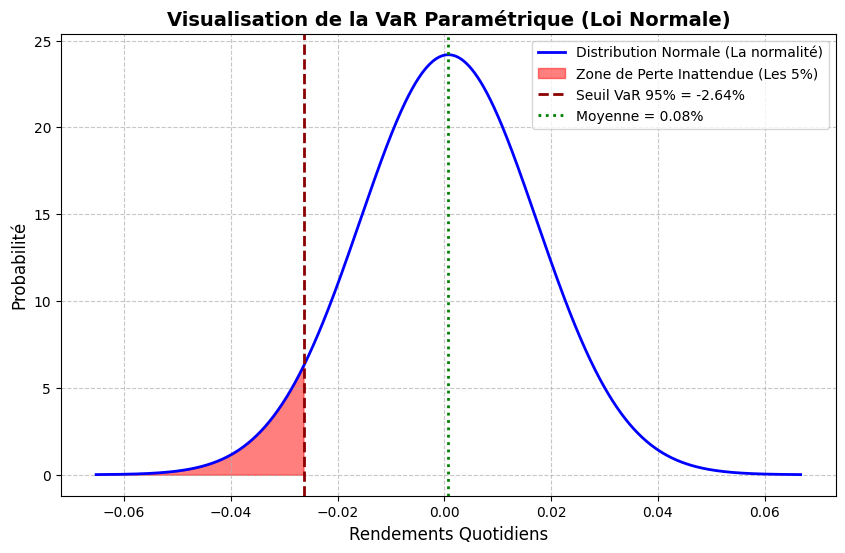

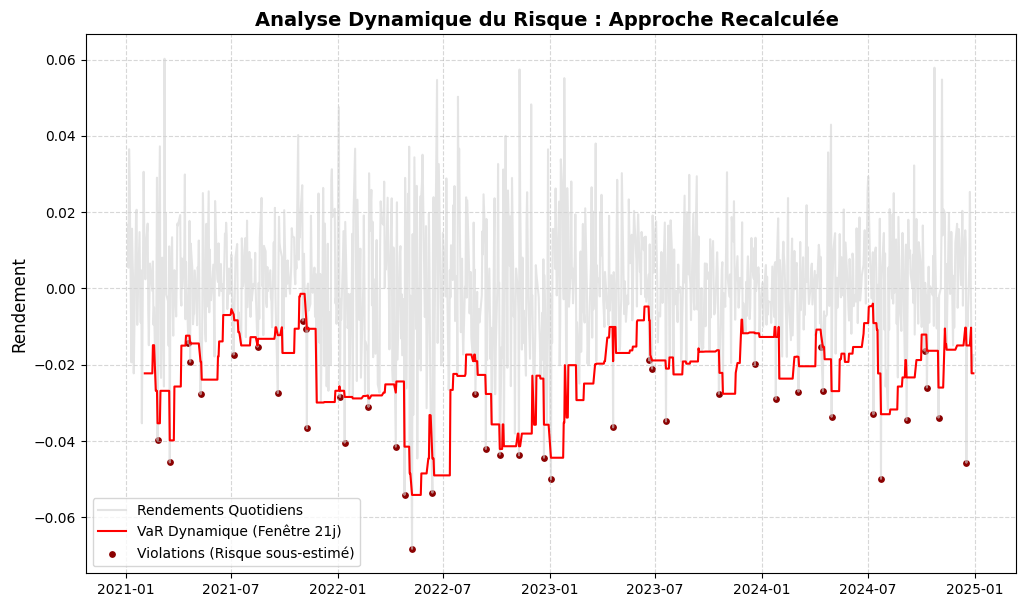

 ANALYSE DU RISQUE DYNAMIQUE 
Sur la période, nous avons observé 42 dépassements de la VaR.
Cela montre que le risque est bien 'recalculé' en fonction des nouvelles informations du marché.


In [6]:
#  ÉTAPE 6: CALCUL DE LA VALUE AT RISK (VaR) À 95%
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


# 1. VaR Historique
var_historique = np.percentile(rendements_portefeuille, 5)

# 2. VaR Paramétrique
moyenne_jour = rendements_portefeuille.mean()
ecart_type_jour = rendements_portefeuille.std()
var_parametrique = stats.norm.ppf(0.05, moyenne_jour, ecart_type_jour)


print(" CRASH TEST : VALUE AT RISK (VaR) JOURNALIÈRE À 95% \n")
print(f" VaR Historique   : {var_historique:.2%}")
print(f" VaR Paramétrique : {var_parametrique:.2%}")
print("-" * 55)

# LA CVaR (Expected Shortfall)

pires_journees = rendements_portefeuille[rendements_portefeuille <= var_historique]

cvar_historique = pires_journees.mean()

print(" SCÉNARIO DU CYGNE NOIR (Quand la crise frappe) \n")
print(f" CVaR (Perte moyenne dans la zone rouge) : {cvar_historique:.2%}")
print("-" * 55)

perte_cvar = abs(cvar_historique)
print(f" Phrase pour l'entretien :")
print(f"« Ma VaR m'indique qu'au pire, la perte sera de {abs(var_historique):.2%}. Mais si un événement extrême survient et que nous franchissons ce seuil de 5 %, la CVaR m'alerte que la perte moyenne plongera à {perte_cvar:.2%}. »")

x = np.linspace(moyenne_jour - 4*ecart_type_jour, moyenne_jour + 4*ecart_type_jour, 1000)

y = stats.norm.pdf(x, moyenne_jour, ecart_type_jour)

plt.figure(figsize=(10, 6))

plt.plot(x, y, color='blue', linewidth=2, label='Distribution Normale (La normalité)')

x_tail = x[x <= var_parametrique]
y_tail = stats.norm.pdf(x_tail, moyenne_jour, ecart_type_jour)
plt.fill_between(x_tail, y_tail, color='red', alpha=0.5, label='Zone de Perte Inattendue (Les 5%)')

plt.axvline(var_parametrique, color='darkred', linestyle='dashed', linewidth=2,
            label=f'Seuil VaR 95% = {var_parametrique:.2%}')

plt.axvline(moyenne_jour, color='green', linestyle='dotted', linewidth=2,
            label=f'Moyenne = {moyenne_jour:.2%}')

plt.title("Visualisation de la VaR Paramétrique (Loi Normale)", fontsize=14, fontweight='bold')
plt.xlabel("Rendements Quotidiens", fontsize=12)
plt.ylabel("Probabilité", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

fenetre = 21

rolling_var = rendements_portefeuille.rolling(window=fenetre).quantile(0.05)

plt.figure(figsize=(12, 7))

plt.plot(rendements_portefeuille, color='lightgray', alpha=0.6, label='Rendements Quotidiens')

plt.plot(rolling_var, color='red', linewidth=1.5, label=f'VaR Dynamique (Fenêtre {fenetre}j)')

violations = rendements_portefeuille[rendements_portefeuille < rolling_var]
plt.scatter(violations.index, violations, color='darkred', s=15, label='Violations (Risque sous-estimé)')

plt.title("Analyse Dynamique du Risque : Approche Recalculée ", fontsize=14, fontweight='bold')
plt.ylabel("Rendement", fontsize=12)
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

nb_violations = len(violations)
print(f" ANALYSE DU RISQUE DYNAMIQUE ")
print(f"Sur la période, nous avons observé {nb_violations} dépassements de la VaR.")
print(f"Cela montre que le risque est bien 'recalculé' en fonction des nouvelles informations du marché.")

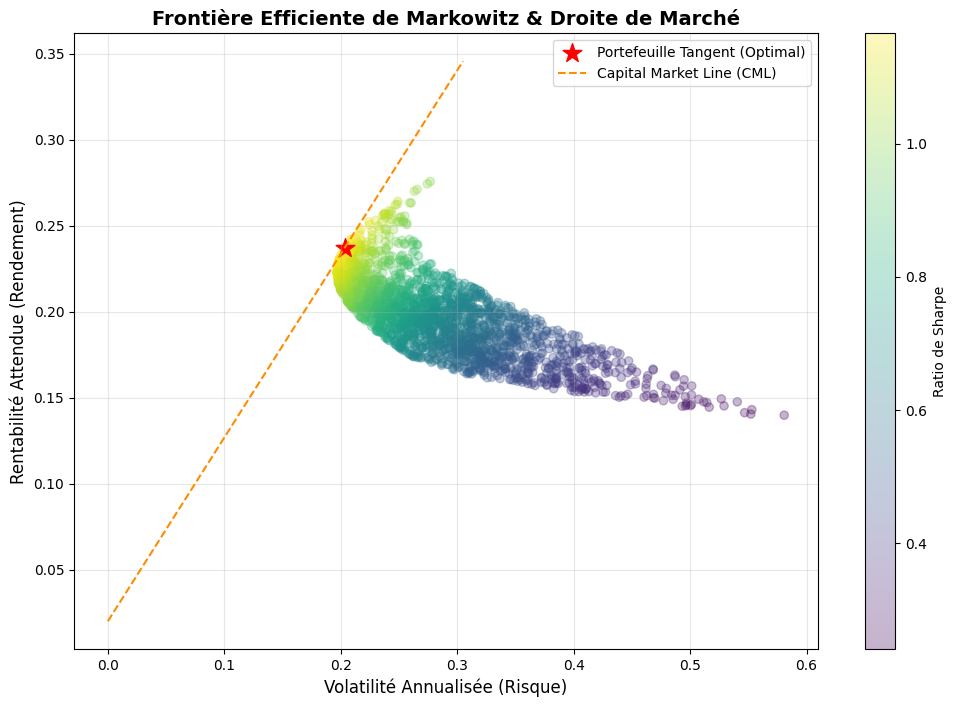

 ALLOCATION OPTIMALE (Ratio de Sharpe Max) 
 - MSFT : 39.48%
 - TSLA : 0.00%
 - XOM : 60.52%

 Performance attendue : 23.71%
 Risque (Volatilité) : 20.33%
 Ratio de Sharpe      : 1.07


In [7]:
# ÉTAPE 7 : OPTIMISATION DE MARKOWITZ & FRONTIÈRE EFFICIENTE

import scipy.optimize as sco
import numpy as np
import matplotlib.pyplot as plt

noms_actions = ['MSFT', 'TSLA', 'XOM']
rendements_opti = rendements[noms_actions]

Rf = 0.02

def statistiques_portefeuille(poids):
    poids = np.array(poids)
    rendement_p = np.sum(rendements_opti.mean() * poids) * 252
    volatilite_p = np.sqrt(np.dot(poids.T, np.dot(rendements_opti.cov() * 252, poids)))
    sharpe_p = (rendement_p - Rf) / volatilite_p
    return np.array([rendement_p, volatilite_p, sharpe_p])

def min_sharpe(poids):
    return -statistiques_portefeuille(poids)[2]

contraintes = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
limites = tuple((0, 1) for _ in range(len(noms_actions)))
poids_initiaux = [1./len(noms_actions)] * len(noms_actions)

resultat_tangent = sco.minimize(min_sharpe, poids_initiaux, method='SLSQP', bounds=limites, constraints=contraintes)
poids_opti = resultat_tangent.x
stats_opti = statistiques_portefeuille(poids_opti)

portefeuilles_rendements = []
portefeuilles_volatilites = []

for _ in range(2000):
    p = np.random.random(len(noms_actions))
    p /= np.sum(p)
    res = statistiques_portefeuille(p)
    portefeuilles_rendements.append(res[0])
    portefeuilles_volatilites.append(res[1])

plt.figure(figsize=(12, 8))
plt.scatter(portefeuilles_volatilites, portefeuilles_rendements, c=np.array(portefeuilles_rendements)/np.array(portefeuilles_volatilites), marker='o', cmap='viridis', alpha=0.3)
plt.colorbar(label='Ratio de Sharpe')

plt.scatter(stats_opti[1], stats_opti[0], color='red', marker='*', s=200, label='Portefeuille Tangent (Optimal)')


x_cml = np.linspace(0, stats_opti[1] * 1.5, 100)
y_cml = Rf + stats_opti[2] * x_cml
plt.plot(x_cml, y_cml, color='darkorange', linestyle='--', label='Capital Market Line (CML)')

plt.title("Frontière Efficiente de Markowitz & Droite de Marché", fontsize=14, fontweight='bold')
plt.xlabel("Volatilité Annualisée (Risque)", fontsize=12)
plt.ylabel("Rentabilité Attendue (Rendement)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f" ALLOCATION OPTIMALE (Ratio de Sharpe Max) ")
for i, action in enumerate(noms_actions):
    print(f" - {action} : {poids_opti[i]:.2%}")
print(f"\n Performance attendue : {stats_opti[0]:.2%}")
print(f" Risque (Volatilité) : {stats_opti[1]:.2%}")
print(f" Ratio de Sharpe      : {stats_opti[2]:.2f}")

 Simulation des trajectoires futures (Modèle GBM)...


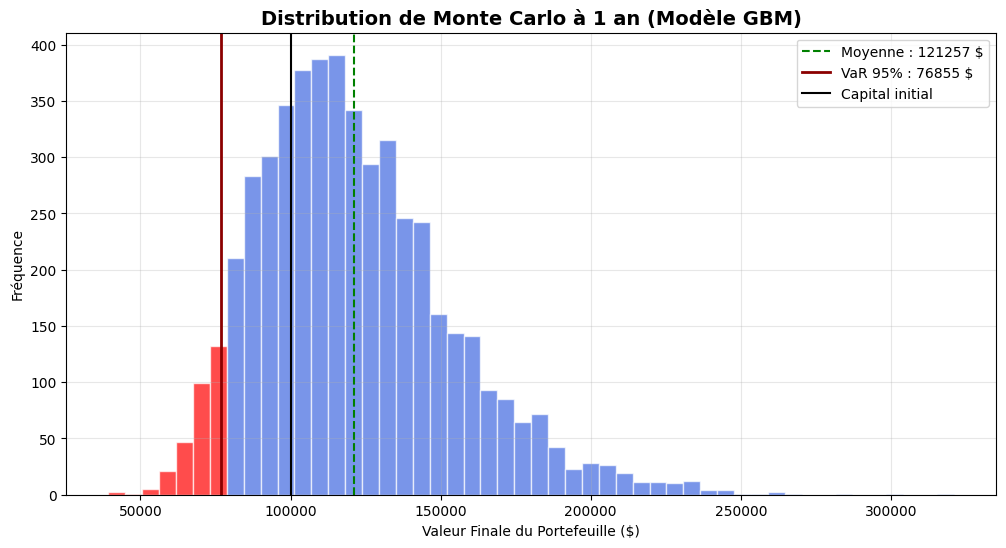


 ANALYSE PRÉVISIONNELLE (MONTE CARLO) 
-------------------------------------------------------
Investissement                   : 100 000 $ 
Rendement annuel espéré (Mu)     : 19.43%
Volatilité annuelle (Sigma)      : 26.19%
-------------------------------------------------------
 VaR 95% (Perte Max Probable)  : 23 145.36 $
 CVaR (Perte Moyenne en Crise) : 30 704.74 $


In [15]:
import numpy as np
import matplotlib.pyplot as plt

#  ÉTAPE 8 : SIMULATION DE MONTE CARLO (MOUVEMENT BROWNIEN GÉOMÉTRIQUE)

print(" Simulation des trajectoires futures (Modèle GBM)...")


jours_a_simuler = 252
nombre_simulations = 5000
capital_initial = 100000

mu_annuel = rendements_portefeuille.mean() * 252
sigma_annuel = rendements_portefeuille.std() * np.sqrt(252)


dt = 1 / 252

drift = (mu_annuel - 0.5 * (sigma_annuel ** 2)) * dt

diffusion = sigma_annuel * np.sqrt(dt)

chocs_z = np.random.standard_normal((jours_a_simuler, nombre_simulations))

rendements_simules = np.exp(drift + diffusion * chocs_z)

trajectoires = capital_initial * np.cumprod(rendements_simules, axis=0)

valeurs_finales = trajectoires[-1, :]
seuil_5 = np.percentile(valeurs_finales, 5)
var_mc_1an = capital_initial - seuil_5
cvar_mc_1an = capital_initial - valeurs_finales[valeurs_finales <= seuil_5].mean()

plt.figure(figsize=(12, 6))

n, bins, patches = plt.hist(valeurs_finales, bins=50, color='royalblue', edgecolor='white', alpha=0.7)

for i in range(len(bins)-1):
    if bins[i] < seuil_5:
        patches[i].set_facecolor('red')

plt.axvline(valeurs_finales.mean(), color='green', linestyle='--', label=f'Moyenne : {valeurs_finales.mean():.0f} $')
plt.axvline(seuil_5, color='darkred', linewidth=2, label=f'VaR 95% : {seuil_5:.0f} $')
plt.axvline(capital_initial, color='black', label='Capital initial')

plt.title("Distribution de Monte Carlo à 1 an (Modèle GBM)", fontsize=14, fontweight='bold')
plt.xlabel("Valeur Finale du Portefeuille ($)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


print(f"\n ANALYSE PRÉVISIONNELLE (MONTE CARLO) ")
print(f"-------------------------------------------------------")
print(f"Investissement                   : 100 000 $ ")
print(f"Rendement annuel espéré (Mu)     : {mu_annuel:.2%}")
print(f"Volatilité annuelle (Sigma)      : {sigma_annuel:.2%}")
print(f"-------------------------------------------------------")
print(f" VaR 95% (Perte Max Probable)  : {var_mc_1an:,.2f} $".replace(',', ' '))
print(f" CVaR (Perte Moyenne en Crise) : {cvar_mc_1an:,.2f} $".replace(',', ' '))